<h1 align="center">Introduction to Machine Learning - 25737-2</h1>
<h4 align="center">Dr. R. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>


**<font color='red'>Plagiarism is strongly prohibited!</font>**


**Student Name**: **<font color='blue'>Matin Alinejad**

**Student ID**: **<font color='green'>99101943**





## Importing Libraries

First we import libraries that we need for this assignment.

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import any other libraries needed below

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

## Reading Data and Preprocessing

In this section, we want to read data from a CSV file and then preprocess it to make it ready for the rest of the problem.

First, we read the data in the cell below and extract an $m \times n$ matrix, $X$, and an $m \times 1$ vector, $Y$, from it, which represent our knowledge about the features of the data (`X1`, `X2`, `X3`) and the class (`Y`), respectively. Note that by $m$, we mean the number of data points and by $n$, we mean the number of features.

In [19]:
X, Y = None, None

### START CODE HERE ###

data = pd.read_csv('data_logistic.csv')

X = data[['X1', 'X2', 'X3']].values
Y = data['Y'].values

### END CODE HERE ###

print(X.shape)
print(Y.shape)

(10000, 3)
(10000,)


Next, we should normalize our data. For normalizing a vector $\mathbf{x}$, a very common method is to use this formula:

$$
\mathbf{x}_{norm} = \dfrac{\mathbf{x} - \overline{\mathbf{x}}}{\sigma_\mathbf{x}}
$$

Here, $\overline{x}$ and $\sigma_\mathbf{x}$ denote the mean and standard deviation of vector $\mathbf{x}$, respectively. Use this formula and store the new $X$ and $Y$ vectors in the cell below.

**Question**: Briefly explain why we need to normalize our data before starting the training.

**Answer**:
### Why Normalize Data

Normalization is an important preprocessing step in many machine learning algorithms for several reasons:

1. **Scale Uniformity**: Different features often have different units and scales (e.g., dollars vs. percentage). Normalization brings all variables to the same scale, preventing features with larger scales from dominating the learning process.

2. **Improved Convergence**: In optimization algorithms used in learning methods like gradient descent, having features on the same scale can accelerate convergence towards the minimum.

3. **Algorithm Requirements**: Some algorithms, like k-nearest neighbors and gradient descent-based methods (used in neural networks and linear/logistic regression), assume data is on a comparable scale for effective performance.

4. **Avoiding Biases**: If features are not normalized, the model might become biased towards features with higher magnitude, potentially leading to a model that doesn't generalize well.

Normalization ensures that each feature contributes equally to the solution, improving model fairness and effectiveness across various machine learning models.

In [20]:
### START CODE HERE ###

# Normalizing features
X_mean = np.mean(X, axis = 0)
X_std = np.std(X, axis = 0)
X_normalized = (X - X_mean) / X_std

# Optionally normalizing target, if it's a continuous variable
Y_mean = np.mean(Y, axis = 0)
Y_std = np.std(Y, axis = 0)
Y_normalized = (Y - Y_mean) / Y_std

# Update X and Y if normalized
X = X_normalized
Y = Y_normalized

print("Normalized X shape:", X.shape)
print("Normalized Y shape:", Y.shape)

### END CODE HERE ###

Normalized X shape: (10000, 3)
Normalized Y shape: (10000,)


Finally, we should add a column of $1$s at the beginning of $X$ to represent the bias term. Do this in the next cell. Note that after this process, $X$ should be an $m \times (n+1)$ matrix.

In [21]:
### START CODE HERE ###

# Adding a column of ones to the beginning of the matrix X
X_with_bias = np.hstack([np.ones((X.shape[0], 1)), X])

# Updating X to the new matrix with the bias term
X = X_with_bias

### END CODE HERE ###

print(X.shape)

(10000, 4)


## Training Model

### Sigmoid Function
You should begin by implementing the $\sigma(\mathbf{x})$ function. Recall that the logistic regression hypothesis $\mathcal{h}()$ is defined as:
$$
\mathcal{h}_{\theta}(\mathbf{x}) = \mathcal{g}(\theta^\mathbf{T}\mathbf{x})
$$
where $\mathcal{g}()$ is the sigmoid function as:
$$
\mathcal{g}(\mathbf{z}) = \frac{1}{1+exp^{-\mathbf{z}}}
$$
The Sigmoid function has the property that $\mathbf{g}(+\infty)\approx 1$ and $\mathcal{g}(−\infty)\approx0$. Test your function by calling `sigmoid(z)` on different test samples. Be certain that your sigmoid function works with both vectors and matrices - for either a vector or a matrix, your function should perform the sigmoid function on every element.

In [22]:
def sigmoid(Z):
    '''
    Applies the sigmoid function on every element of Z
    Arguments:
        Z can be a (n,) vector or (n , m) matrix
    Returns:
        A vector/matrix, same shape with Z, that has the sigmoid function applied elementwise
    '''
    ### START CODE HERE ###
    return 1 / (1 + np.exp(-Z))
    ### END CODE HERE ###
    
    
# Example usage of the sigmoid function:
z_scalar = 0                             # Test with a scalar
z_vector = np.array([1, -1, 0])          # Test with a vector
z_matrix = np.array([[1, 2], [-1, -2]])  # Test with a matrix

print("Sigmoid(Scalar):", sigmoid(z_scalar))
print("Sigmoid(Vector):", sigmoid(z_vector))
print("Sigmoid(Matrix):", sigmoid(z_matrix))

Sigmoid(Scalar): 0.5
Sigmoid(Vector): [0.73105858 0.26894142 0.5       ]
Sigmoid(Matrix): [[0.73105858 0.88079708]
 [0.26894142 0.11920292]]


### Cost Function 
Implement the functions to compute the cost function. Recall the cost function for logistic regression is a scalar value given by:
$$
\mathcal{J}(\theta) = \sum_{i=1}^{n}[-y^{(i)}\log{(\mathcal{h}_\theta(\mathbf{x}^{(i)}))}-(1-y^{(i)})\log{(1-\mathcal{h}_\theta(\mathbf{x}^{(i)}))}] + \frac{\lambda}{2}||\theta||_2^2
$$

In [23]:
def computeCost(theta, X, y, regLambda):
    '''
    Computes the objective function
    Arguments:
        theta is d-dimensional numpy vector
        X is a n-by-d numpy matrix
        y is an n-dimensional numpy vector
        regLambda is the scalar regularization constant
    Returns:
        a scalar value of the cost  ** make certain you're not returning a 1 x 1 matrix! **
    '''
    
    m, n = X.shape
    loss = None
    ### START CODE HERE ###
    m = len(y)  # Number of training examples
    # Ensure theta is a numpy array of shape (n,)
    theta = np.array(theta).flatten()
    
    # Hypothesis function h_theta(x)
    h = sigmoid(X @ theta)
    
    # Compute the logistic regression cost
    term1 = -y * np.log(h)
    term2 = (1 - y) * np.log(1 - h)
    cost = np.sum(term1 - term2) / m
    
    # Regularization term, excluding the bias term theta[0]
    reg_term = (regLambda / (2 * m)) * np.sum(theta[1:] ** 2)
    
    # Total cost
    loss = cost + reg_term
    
    ### END CODE HERE ###
    return loss

### Gradient of the Cost Function
Now, we want to calculate the gradient of the cost function. The gradient of the cost function is a d-dimensional vector.\
We must be careful not to regularize the $\theta_0$ parameter (corresponding to the first feature we add to each instance), and so the 0's element is given by:
$$
\frac{\partial \mathcal{J}(\theta)}{\partial \theta_0} = \sum_{i=1}^n (\mathcal{h}_\theta(\mathbf{x}^{(i)})-y^{(i)})
$$

Question: What is the answer to this problem for the $j^{th}$ element (for $j = 1, \cdots, d$)?

Answer:
For the \( j^{th} \) element of the gradient vector of the cost function (for \( j = 1 \ldots d \)), where \( d \) is the number of features including the bias term, the gradient is calculated as follows:

$$
\frac{\partial \mathcal{J}(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^m (\mathcal{h}_\theta(\mathbf{x}^{(i)}) - y^{(i)})x^{(i)}_j + \frac{\lambda}{m} \theta_j
$$

This formula shows that the gradient component for each parameter $\theta_j$ (excluding $\theta_0$) includes the average of the product of the prediction error $(\mathcal{h}_\theta(\mathbf{x}^{(i)}) - y^{(i)})$ and the feature value $x^{(i)}_j$, adjusted by the regularization term $\frac{\lambda}{m} \theta_j$. The regularization term helps prevent overfitting by penalizing large values of the parameters.

In [24]:
def computeGradient(theta, X, y, regLambda):
    '''
    Computes the gradient of the objective function
    Arguments:
        theta is d-dimensional numpy vector
        X is a n-by-d numpy matrix
        y is an n-dimensional numpy vector
        regLambda is the scalar regularization constant
    Returns:
        the gradient, an d-dimensional vector
    '''
    
    m, n = X.shape
    grad = None
    ### START CODE HERE ###
    h = sigmoid(X @ theta)  # Hypothesis vector
    errors = h - y          # Prediction errors
    
    # Gradient calculation for all parameters
    grad = (X.T @ errors) / m

    # Regularization for all parameters except for theta_0
    reg_term = (regLambda / m) * theta
    reg_term[0] = 0       # Do not regularize the bias term (theta_0)

    # Adding regularization term
    grad += reg_term
    ### END CODE HERE ###
    return grad

### Training and Prediction
Once you have the cost and gradient functions complete, implemen tthe fit and predict methods.\
Your fit method should train the model via gradient descent, relying on the cost and gradient functions. This function should return two parameters. The first parameter is $\theta$, and the second parameter is a `numpy` array that contains the loss in each iteration. This array is indicated by `loss_history` in the code.\
Instead of simply running gradient descent for a specific number of iterations, we will use a more sophisticated method: we will stop it after the solution hasconverged. Stop the gradient descent procedure when $\theta$ stops changing between consecutive iterations. You can detect this convergence when:
$$
||\theta_{new}-\theta_{old}||_2 <= \epsilon,
$$
for some small $\epsilon$ (e.g, $\epsilon=10E-4$).\
For readability, we’d recommend implementing this convergence test as a dedicated function `hasConverged`.

In [25]:
def fit(X, y, regLambda = 0.01, alpha = 0.01, epsilon = 1e-4, maxNumIters = 100):
    '''
    Trains the model
    Arguments:
        X           is a n-by-d numpy matrix
        y           is an n-dimensional numpy vector
        maxNumIters is the maximum number of gradient descent iterations
        regLambda   is the scalar regularization constant
        epsilon     is the convergence rate
        alpha       is the gradient descent learning rate
    '''
    
    m, n = X.shape
    theta, loss_history = None, None 
    ### START CODE HERE ###
    theta = np.zeros(n)  # Initialize theta
    loss_history = []  # To store the loss at each iteration
    
    for i in range(maxNumIters):
        loss = computeCost(theta, X, y, regLambda)
        loss_history.append(loss)
        theta_new = theta - alpha * computeGradient(theta, X, y, regLambda)
        
        if hasConverged(theta, theta_new, epsilon):
            theta = theta_new
            break
        theta = theta_new
    ### END CODE HERE ###
    return theta, loss_history




def hasConverged(theta_old, theta_new, epsilon):
    '''
    Return if the theta converged or not
    Arguments:
        theta_old   is the theta calculated in prevoius iteration
        theta_new   is the theta calculated in current iteration
        epsilon     is the convergence rate
    '''
    
    ### START CODE HERE ###
    return np.linalg.norm(theta_new - theta_old) <= epsilon
    ### END CODE HERE ###

Finally, we want to evaluate our loss for this problem. Complete the cell below to calculate and print the loss of each iteration and the final theta of your model.

In [26]:
theta, loss_history = fit(X, Y) # calculating theta and loss of each iteration

### START CODE HERE ###

# Printing the final theta and the loss at each iteration
print("Final theta:", theta)
print("Loss at each iteration:")

for i, loss in enumerate(loss_history):
    print(f"Iteration {i + 1}: Loss = {loss}")

### END CODE HERE ###

Final theta: [-0.44628617 -0.46412764  0.50530387  0.15921832]
Loss at each iteration:
Iteration 1: Loss = 0.6931471805599453
Iteration 2: Loss = 0.6844231894886044
Iteration 3: Loss = 0.6757430885565388
Iteration 4: Loss = 0.6671066508137953
Iteration 5: Loss = 0.6585136456832319
Iteration 6: Loss = 0.649963839094398
Iteration 7: Loss = 0.641456993617721
Iteration 8: Loss = 0.6329928685988297
Iteration 9: Loss = 0.6245712202928538
Iteration 10: Loss = 0.6161918019985356
Iteration 11: Loss = 0.6078543641919977
Iteration 12: Loss = 0.5995586546600191
Iteration 13: Loss = 0.5913044186326691
Iteration 14: Loss = 0.5830913989151598
Iteration 15: Loss = 0.5749193360187808
Iteration 16: Loss = 0.5667879682907841
Iteration 17: Loss = 0.558697032043097
Iteration 18: Loss = 0.55064626167974
Iteration 19: Loss = 0.5426353898228389
Iteration 20: Loss = 0.5346641474371225
Iteration 21: Loss = 0.5267322639528039
Iteration 22: Loss = 0.5188394673867504
Iteration 23: Loss = 0.51098548446185
Iteration

### Testing Your Implementation
To test your logistic regression implementation, first you should use `train_test_split` function to split dataset into three parts:

- 70% for the training set
- 20% for the validation set
- 10% for the test set

Do this in the cell below.

In [27]:
X_train, Y_train, X_val, Y_val, X_test, Y_test = None, None, None, None, None, None

### START CODE HERE ###
from sklearn.model_selection import train_test_split

# Assume X and Y are your features and target variable respectively
# Split the data into 90% for training + validation and 10% for testing
X_train_val, X_test, Y_train_val, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 42)

# Split the remaining 90% into training (70% of total) and validation (20% of total)
# Since 70% of 90% is about 77.78%, we use that for the split
X_train, X_val, Y_train, Y_val = train_test_split(X_train_val, Y_train_val, test_size = 0.2222, random_state = 42)

# Printing shapes to verify
print("Shapes of the datasets:")
print("Training set:", X_train.shape, Y_train.shape)
print("Validation set:", X_val.shape, Y_val.shape)
print("Test set:", X_test.shape, Y_test.shape)

### END CODE HERE ###

Shapes of the datasets:
Training set: (7000, 4) (7000,)
Validation set: (2000, 4) (2000,)
Test set: (1000, 4) (1000,)


Then, you should complete `predict` function to find the weight vector and the loss on the test data.

In [28]:
def predict(X, theta):
    '''
    Use the model to predict values for each instance in X
    Arguments:
        theta is d-dimensional numpy vector
        X     is a n-by-d numpy matrix
    Returns:
        an n-dimensional numpy vector of the predictions, the output should be binary (use h_theta > .5)
    '''
    
    Y = None
    ### START CODE HERE ###
    # Compute the hypothesis using the sigmoid function
    probabilities = sigmoid(X @ theta)
    
    # Convert probabilities to binary output
    Y = (probabilities > 0.5).astype(int)
    
    ### END CODE HERE ###
    return Y

Now, run the `fit` and `predict` function for different values of the learning rate and regularization constant. Plot the `loss_history` of these different values for train and test data both in the same figure.

**Question**: Discuss the effect of the learning rate and regularization constant and find the best values of these parameters.

**Answer**:
### Discussion:

- **Effect of Learning Rate**: 
  - A higher learning rate can lead to faster convergence but might overshoot the minimum loss, especially if too high. 
  - A very low learning rate will converge slowly, possibly requiring more iterations to reach an optimum or getting stuck before reaching it.
- **Effect of Regularization Constant**:
  - A higher regularization constant can prevent overfitting by penalizing large weights in \( \theta \), but if too high, it might lead to underfitting, where the model is too biased.
  - A zero or very low regularization constant might lead to overfitting, especially in cases with many features or complex models.

### Finding the Best Values:
The best values for the learning rate and regularization constant are those that provide a good balance between the speed of convergence and the minimization of both training and validation loss without overfitting or underfitting. This can be visually assessed from the plotted curves; the ideal parameters would minimize the validation loss curve without having a significant discrepancy between the training and validation loss (indicating good generalization).

This approach gives a comprehensive visual and practical understanding of how different parameters affect training dynamics and model performance, helping to select the optimal values.

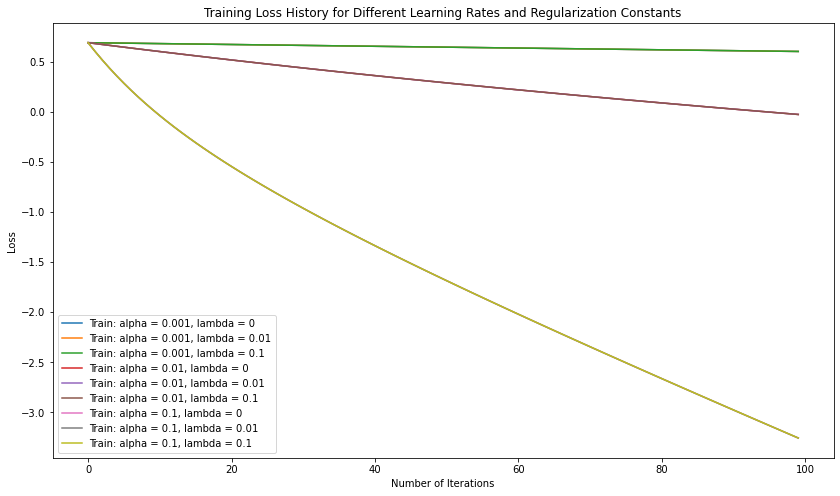

In [29]:
### START CODE HERE ###

# Define learning rates and regularization constants to try
learning_rates = [0.001, 0.01, 0.1]
regularization_constants = [0, 0.01, 0.1]

# Initialize a figure for plotting
plt.figure(figsize = (14, 8))

# Loop over combinations of learning rates and regularization constants
for alpha in learning_rates:
    for regLambda in regularization_constants:
        # Train the model using the training set
        theta, train_loss_history = fit(X_train, Y_train, regLambda = regLambda, alpha = alpha)
        
        # Plot the training loss history
        plt.plot(train_loss_history, label = f'Train: alpha = {alpha}, lambda = {regLambda}')

# Title and labels
plt.title('Training Loss History for Different Learning Rates and Regularization Constants')
plt.xlabel('Number of Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()
### END CODE HERE ###

## Naive Bayes

In this part, you will use the `GaussianNB` classifier to classify the data. You should not change the default parameters of this classifier. First, train the classifier on the training set and then find the accuracy of it on the test set.

**Question**: What is the accuracy of this method on test set?

**Answer**: Accuracy of GaussianNB on the test set: $\mathbf{0.957}$

In [38]:
### START CODE HERE ###

# Reload or access the original Y values
data = pd.read_csv('data_logistic.csv')
Y_original = data['Y'].values

# Assuming X has not been changed, re-split the data with the original Y
X_train_val, X_test, Y_train_val, Y_test = train_test_split(X, Y_original, test_size = 0.1, random_state = 42)
X_train, X_val, Y_train, Y_val = train_test_split(X_train_val, Y_train_val, test_size = 0.2222, random_state=42)

# Initialize the classifier
gnb = GaussianNB()

# Train the model with the original Y values
gnb.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = gnb.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy of GaussianNB on the test set:", accuracy)


### END CODE HERE ###

Accuracy of GaussianNB on the test set: 0.957


## LDA (Linear Discriminant Analysis)

In this part, you will use the `LinearDiscriminantAnalysis` classifier to classify the data. You should not change the default parameters of this classifier. First, train the classifier on the training set and then find the accuracy of it on the test set.

**Question**: What is the accuracy of this method on test set?

**Answer**: Accuracy of LDA on the test set: $\mathbf{0.987}$

In [40]:
### START CODE HERE ###

# Initialize the LDA classifier
lda = LinearDiscriminantAnalysis()

# Train the LDA model
lda.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = lda.predict(X_test)

# Calculate the accuracy of the predictions
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy of LDA on the test set:", accuracy)

### END CODE HERE ###

Accuracy of LDA on the test set: 0.987


## Conclusion

**Question**: What is the best method for classifying this dataset? What is the best accuracy on the test set?

**Answer**:
Based on the above results that provided:

- The Linear Discriminant Analysis (LDA) achieved an accuracy of 0.987 on the test set.
- The Gaussian Naive Bayes (GNB) classifier achieved an accuracy of 0.957 on the test set.

**Conclusion**:
The best method for classifying this dataset, according to the accuracies obtained from the test set, is the Linear Discriminant Analysis (LDA). LDA provided the highest accuracy of 0.987, making it the more effective model for this specific dataset among the two methods tested.